In [1]:
import metrica.Metrica_IO as mio
import metrica.Metrica_Viz as mviz
import metrica.Metrica_Velocities as mvel
import metrica.Metrica_PitchControl as mpc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
DATADIR = "../data"
game_id = 1  # let's look at sample match 1

In [3]:
# read in the event data
events = mio.read_event_data(DATADIR, game_id)

In [4]:
# read in tracking data
tracking_home = mio.tracking_data(DATADIR, game_id, "Home")
tracking_away = mio.tracking_data(DATADIR, game_id, "Away")

Reading team: home
Reading team: away


In [5]:
# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)
events = mio.to_metric_coordinates(events)

In [6]:
# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(
    tracking_home, tracking_away, events
)

In [7]:
home_shots = events[events.Type == "SHOT"]
home_goals = home_shots[home_shots["Subtype"].str.contains("-GOAL")]
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,44.52,2.04,54.06,-3.40
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,44.52,-12.92,53.00,2.72
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,50.88,2.72,54.06,0.68


In [8]:
# Calculate player velocities
tracking_home = mvel.calc_player_velocities(tracking_home, smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away, smoothing=True)

In [9]:
""" **** pitch control for passes leading up to goal 2 **** """

' **** pitch control for passes leading up to goal 2 **** '

In [10]:
# get all shots and goals in the match
shots = events[events["Type"] == "SHOT"]
goals = shots[shots["Subtype"].str.contains("-GOAL")].copy()

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

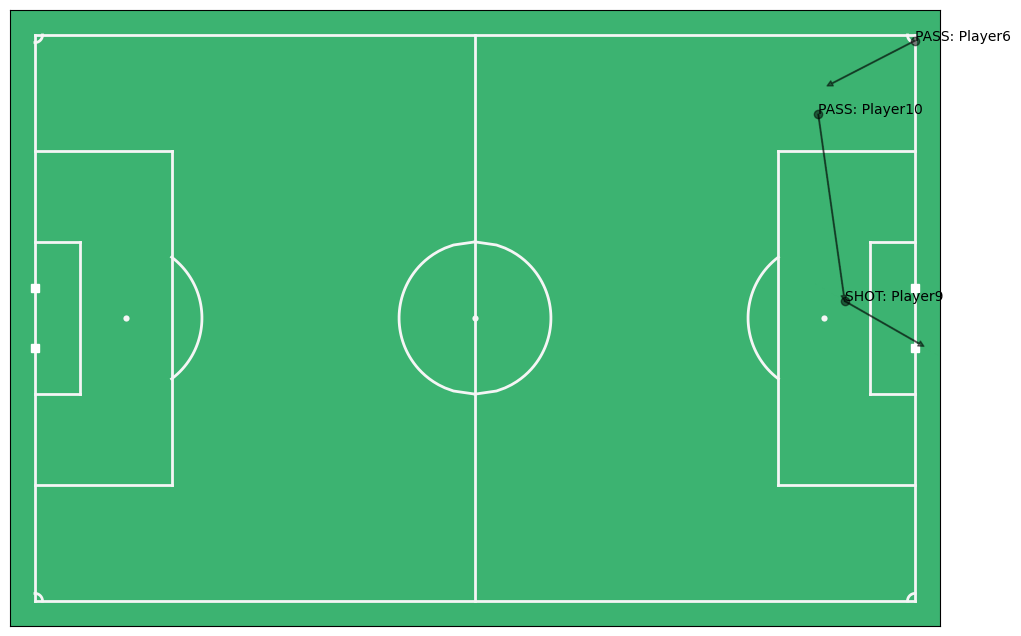

In [11]:
# # plot the 2 events leading up to the first goal
mviz.plot_events(
    events.loc[32:34], color="k", indicators=["Marker", "Arrow"], annotate=True
)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

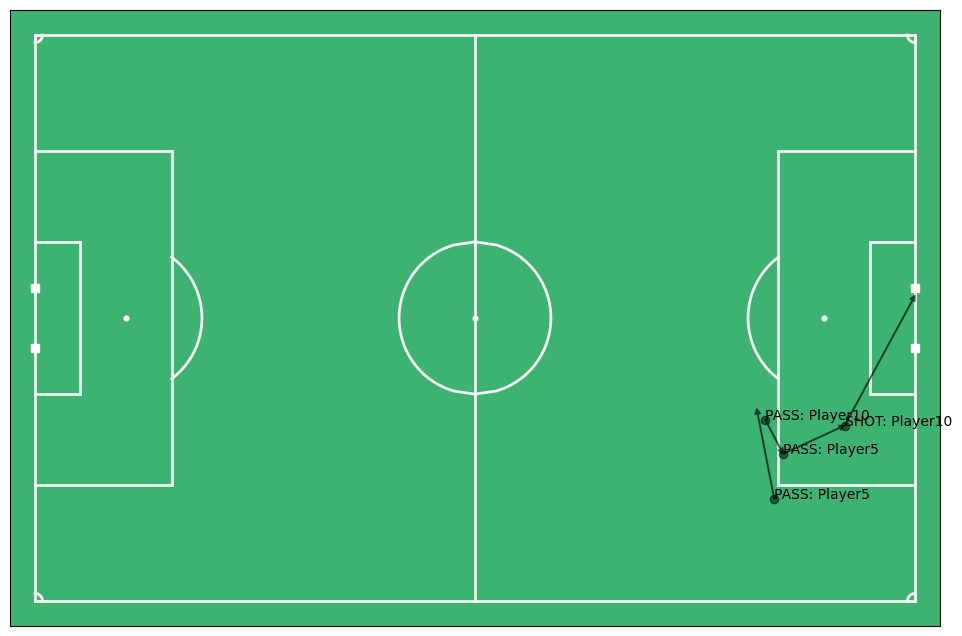

In [12]:
# plot the 3 events leading up to the second goal
mviz.plot_events(
    events.loc[1111:1114], color="k", indicators=["Marker", "Arrow"], annotate=True
)

In [13]:
# first get pitch control model parameters
params = mpc.default_model_params()

In [14]:
# find goalkeepers for offside calculation
GK_numbers = [mio.find_goalkeeper(tracking_home), mio.find_goalkeeper(tracking_away)]
GK_numbers

['11', '25']

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

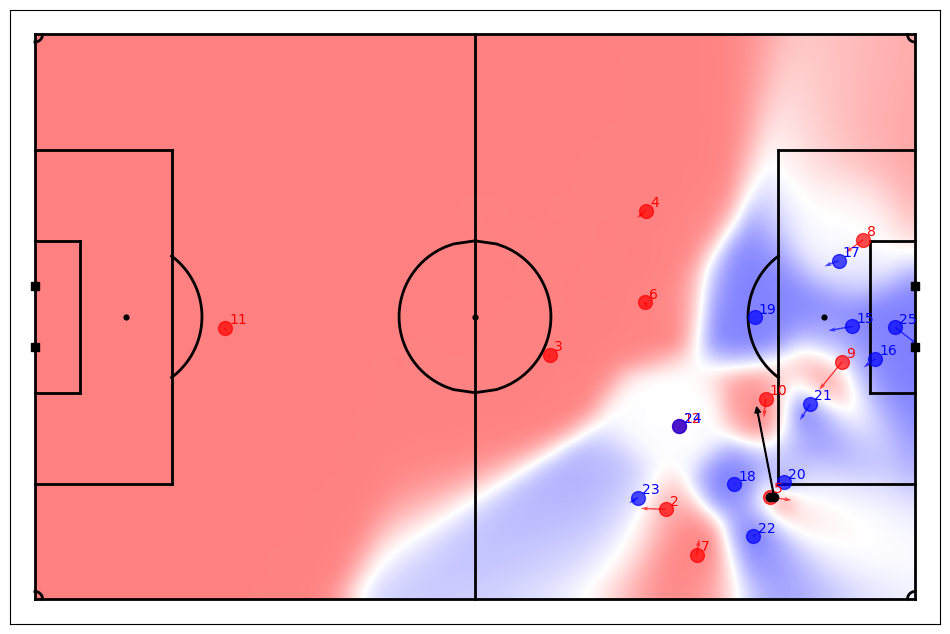

In [15]:
# evaluated pitch control surface for first pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1111,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)
mviz.plot_pitchcontrol_for_event(
    1111, events, tracking_home, tracking_away, PPCF, annotate=True
)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

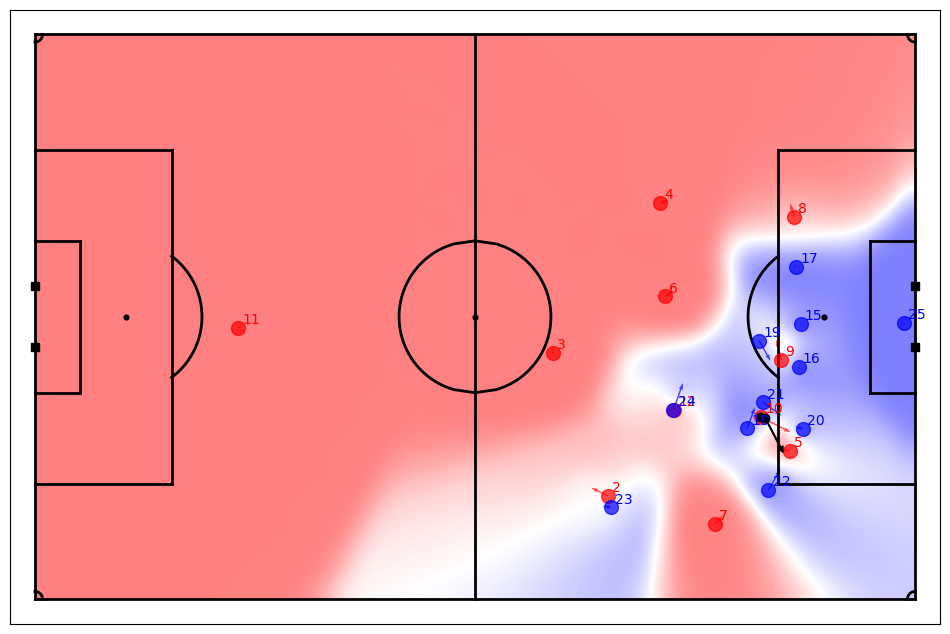

In [16]:
# evaluated pitch control surface for second pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1112,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)
mviz.plot_pitchcontrol_for_event(
    1112, events, tracking_home, tracking_away, PPCF, annotate=True
)

(<Figure size 1200x800 with 1 Axes>, <Axes: >)

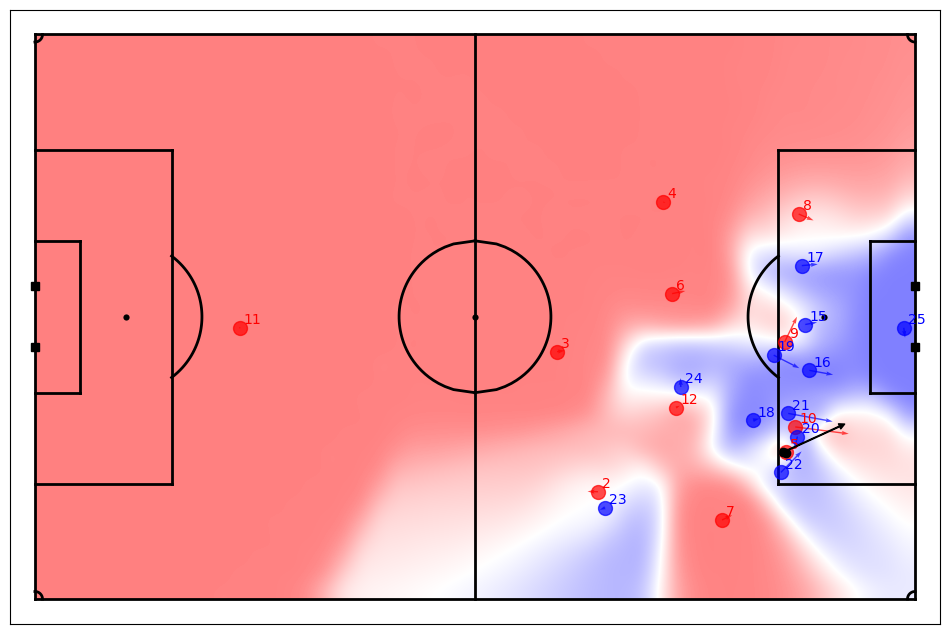

In [17]:
# evaluated pitch control surface for third pass
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    1113,
    events,
    tracking_home,
    tracking_away,
    params,
    GK_numbers,
    field_dimen=(
        106.0,
        68.0,
    ),
    n_grid_cells_x=50,
)

mviz.plot_pitchcontrol_for_event(
    1113, events, tracking_home, tracking_away, PPCF, annotate=True
)

In [18]:
""" **** calculate pass probability for every home team succesful pass **** """

' **** calculate pass probability for every home team succesful pass **** '

In [19]:
# get all home passes
home_passes = events[(events["Type"].isin(["PASS"])) & (events["Team"] == "Home")]
home_passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
15,Home,PASS,HEAD,1,498,19.92,536,21.44,Player2,Player9,-14.84,-11.56,3.18,-6.12
16,Home,PASS,NaN,1,536,21.44,556,22.24,Player9,Player10,3.18,-6.12,0.00,-10.20
25,Home,PASS,HEAD,1,1134,45.36,1154,46.16,Player5,Player6,-19.08,-26.52,-20.14,-19.04
26,Home,PASS,NaN,1,1154,46.16,1177,47.08,Player6,Player10,-20.14,-19.04,-9.54,-16.32
27,Home,PASS,NaN,1,1226,49.04,1266,50.64,Player10,Player8,-4.24,-12.24,6.36,10.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,Home,PASS,NaN,2,139824,5592.96,139852,5594.08,Player7,Player14,-16.96,-31.96,-6.36,-23.80
1711,Home,PASS,GOAL KICK,2,140478,5619.12,140496,5619.84,Player11,Player7,-48.76,1.36,-36.04,-21.08
1739,Home,PASS,NaN,2,143262,5730.48,143297,5731.88,Player14,Player12,-26.50,-19.04,-22.26,-14.96
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,-10.60,-11.56,32.86,30.60


In [20]:
# list for storing pass probablities
pass_success_probability = []

for i, row in home_passes.iterrows():
    pass_start_pos = np.array([row["Start X"], row["Start Y"]])
    pass_target_pos = np.array([row["End X"], row["End Y"]])
    pass_frame = row["Start Frame"]

    attacking_players = mpc.initialise_players(
        tracking_home.loc[pass_frame], "Home", params, GK_numbers[0]
    )
    defending_players = mpc.initialise_players(
        tracking_away.loc[pass_frame], "Away", params, GK_numbers[1]
    )
    Patt, Pdef = mpc.calculate_pitch_control_at_target(
        pass_target_pos, attacking_players, defending_players, pass_start_pos, params
    )

    pass_success_probability.append((i, Patt))

pass_success_probability

[(15, 0.5764185616969356),
 (16, 0.7510428577208592),
 (25, 0.884518464368136),
 (26, 0.9051932779654118),
 (27, 0.8933966608182421),
 (32, 0.9877554577016855),
 (33, 0.44294551435519824),
 (43, 0.44918373827296565),
 (57, 0.9896382010162094),
 (74, 0.9367268404407124),
 (77, 0.9790450585442516),
 (78, 0.9386050272057043),
 (92, 0.7195634231142707),
 (133, 0.8362835008192602),
 (134, 0.628989808085944),
 (139, 0.9861355456280826),
 (140, 0.9180798359885526),
 (141, 0.9877066677792863),
 (142, 0.9897280021476356),
 (148, 0.7071586643084055),
 (168, 0.5974877241915761),
 (169, 0.9465317843326578),
 (184, 0.5789837573887278),
 (185, 0.9741122056660225),
 (186, 0.8819149475596905),
 (196, 1.0),
 (203, 0.9273225482407363),
 (206, 0.776183671641435),
 (207, 0.5471420820352781),
 (213, 0.9690663646660256),
 (218, 0.9894514289840155),
 (219, 0.7172739380422649),
 (220, 0.8819190363347027),
 (221, 0.9908214486642122),
 (222, 0.9865068212642215),
 (223, 0.9687783434303647),
 (224, 0.986566161732

Text(0, 0.5, 'Frequency')

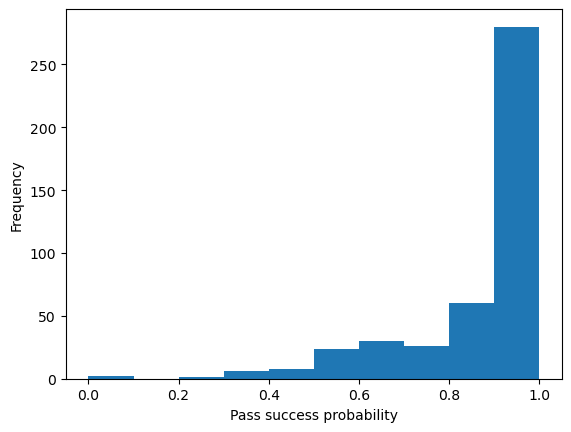

In [21]:
fig, ax = plt.subplots()
ax.hist([p[1] for p in pass_success_probability], np.arange(0, 1.1, 0.1))
ax.set_xlabel("Pass success probability")
ax.set_ylabel("Frequency")

In [22]:
# sort the passes by pitch control probability
pass_success_probability = sorted(pass_success_probability, key=lambda x: x[1])

In [23]:
# identify the events corresponding to the most risky passes (pitch control < 0.5)
risky_passes = events.loc[[p[0] for p in pass_success_probability if p[1] < 0.5]]
risky_passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1303,Home,PASS,NaN,2,107585,4303.40,107688,4307.52,Player2,Player5,-22.26,-17.68,30.74,-27.88
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,-10.60,-11.56,32.86,30.60
657,Home,PASS,CROSS,1,53604,2144.16,53634,2145.36,Player7,Player8,49.82,-18.36,47.70,-0.00
1331,Home,PASS,NaN,2,108818,4352.72,108873,4354.92,Player5,Player10,-15.90,-26.52,-4.24,-19.04
361,Home,PASS,NaN,1,26590,1063.60,26608,1064.32,Player10,Player8,38.16,-10.88,47.70,-2.04
1208,Home,PASS,CROSS,2,98958,3958.32,99005,3960.20,Player4,Player5,33.92,19.04,48.76,-9.52
1457,Home,PASS,NaN,2,118799,4751.96,118861,4754.44,Player5,Player10,2.12,-0.68,34.98,-16.32
1528,Home,PASS,GOAL KICK,2,125558,5022.32,125677,5027.08,Player11,Player9,-50.88,-2.04,14.84,-26.52
348,Home,PASS,NaN,1,24980,999.20,25031,1001.24,Player4,Player10,-25.44,34.68,-16.96,27.20
570,Home,PASS,NaN,1,45835,1833.40,45904,1836.16,Player2,Player9,-13.78,-25.16,26.50,-24.48


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

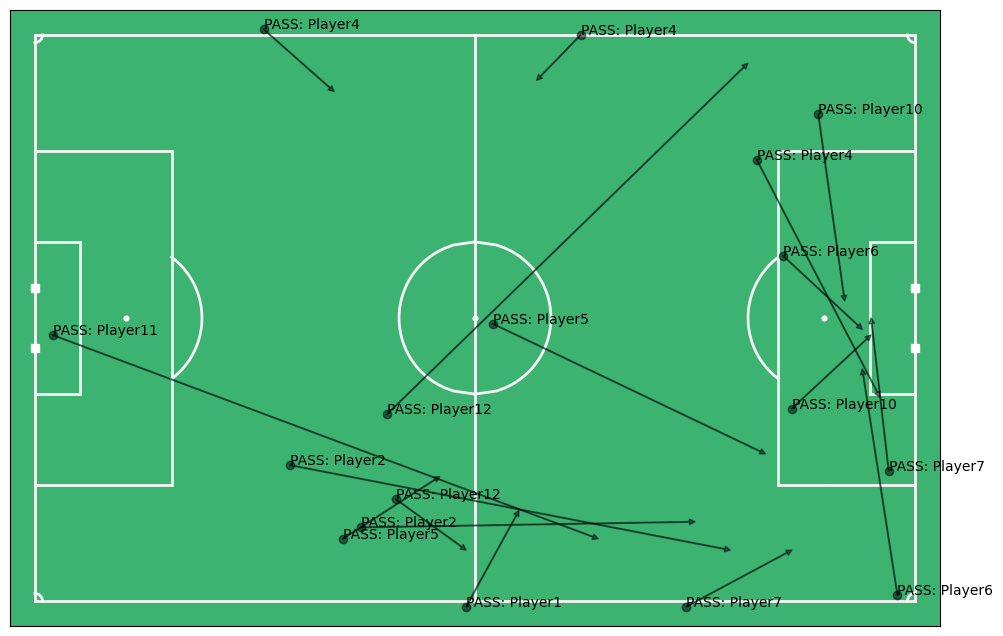

In [24]:
# plot the risky passes
mviz.plot_events(risky_passes, color="k", indicators=["Marker", "Arrow"], annotate=True)

In [25]:
# Print events that followed those risky passes
print("Event following a risky (completed) pass")
for p in pass_success_probability[:20]:
    outcome = events.loc[p[0] + 1].Type
    print(p[1], outcome)

Event following a risky (completed) pass
0.0597114090191567 BALL LOST
0.08168200787370786 PASS
0.26815875535020706 CHALLENGE
0.33516741193115557 PASS
0.3469926626736874 SHOT
0.3612404989802527 SHOT
0.3709885317987774 SHOT
0.37118485810362484 BALL LOST
0.38246026505091757 CHALLENGE
0.4371054451603015 CHALLENGE
0.43877288629307143 CHALLENGE
0.44294551435519824 SHOT
0.44715966107884275 CHALLENGE
0.4475269483868594 BALL OUT
0.44918373827296565 BALL LOST
0.4718753003120619 CHALLENGE
0.48409635687898456 PASS
0.5020059547496684 PASS
0.5079398752563166 BALL LOST
0.5135958506155978 CHALLENGE


In [26]:
# Homework
# 1. How might you use the pitch control model to calculate how much space was created (or territory captured) by an off the ball run? Hint: consider what the pitch control surface might have looked like if the player had *not* made a run

In [27]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-52.91308,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-52.89824,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,-52.87916,1.19816,-18.39312,-10.41896,-17.27694,0.77316,-20.21738,9.84028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,-52.87174,1.19816,-18.42068,-10.41556,-17.29178,0.68816,-20.19936,9.82328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,-52.86326,1.19816,-18.44718,-10.38292,-17.31616,0.66776,-20.19512,9.84096,...,0.81149,0.590571,1.369714,1.491607,-0.049214,1.806857,1.807527,0.208214,1.296857,1.313466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,2,5800.08,-43.05084,-3.15860,NaN,NaN,16.79358,9.92664,19.89832,11.90884,...,NaN,0.000000,0.000000,0.000000,0.374786,0.170000,0.411539,-0.280143,-0.551286,0.618382
145003,2,5800.12,-42.98300,-3.15860,NaN,NaN,16.82538,9.91644,19.89620,11.91972,...,NaN,0.000000,0.000000,0.000000,0.488357,0.228286,0.539080,0.037857,-0.731000,0.731980
145004,2,5800.16,-42.92152,-3.15860,NaN,NaN,16.86566,9.90692,19.91316,11.90068,...,NaN,0.000000,0.000000,0.000000,0.654929,0.366107,0.750311,0.395607,-0.813571,0.904657


In [28]:
events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.00,0,0.04,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,-5.30,7.48,5.30,4.76
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,5.30,4.76,8.48,19.72
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,5.30,21.08,-5.30,12.92
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,-5.30,12.24,-1.06,2.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,-10.60,-11.56,32.86,30.60
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,43.46,25.84,38.16,12.92
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,39.22,12.92,45.58,7.48
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,47.70,8.16,NaN,NaN


In [29]:
# i = 89486
# event_id = events.loc[(i >= events['Start Frame']) & (i <= events['End Frame'])].index
# events.loc[1103]
# ht = tracking_home.iloc[90005-500:90028]
# ht.index[0]


In [30]:
# tracking_home.loc[89486]

In [31]:
PLOTDIR = DATADIR
mviz.save_match_pc_clip(events,tracking_home.iloc[90000:90028],tracking_away.iloc[90000:90028],PLOTDIR,include_player_velocities=False)

ValueError: Lengths must match to compare

In [ ]:
# # Create a Physical summary dataframe for home players
# # Starts off empty except for jersey number
# home_players = np.unique(
#     [c.split("_")[1] for c in tracking_home.columns if c[:4] == "Home"]
# )
# home_summary = pd.DataFrame(index=home_players)

In [ ]:
# # sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
# nsprints = []
# sprint_threshold = 7  # minimum speed to be defined as a sprint (m/s)
# sprint_window = (
#     1 * 25
# )  # minimum duration sprint should be sustained (in this case, 1 second = 25 consecutive frames)
# for player in home_summary.index:
#     column = "Home_" + player + "_speed"
#     # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
#     # diff helps us to identify when the window starts
#     player_sprints = np.diff(
#         1
#         * (
#             np.convolve(
#                 1 * (tracking_home[column] >= sprint_threshold),
#                 np.ones(sprint_window),
#                 mode="same",
#             )
#             >= sprint_window
#         )
#     )
#     nsprints.append(np.sum(player_sprints == 1))
# home_summary["# sprints"] = nsprints

In [ ]:
# tracking_home

In [ ]:
# num_players = 14

# tracking_home['sprinting_counts'] = tracking_home[[f'Home_{i}_speed' for i in range(1, num_players + 1) if i != 11]].gt(7).sum(axis=1)

# filtered_df = tracking_home[tracking_home['sprinting_counts'] == 1]

# index_column_df = filtered_df.filter(like='speed').stack()
# index_column_df.loc[index_column_df > 7]

In [ ]:
# num_players = 14

# # # Count every column where player is sprinting, skip player 11, the goalie
# # conditions_met = sum(tracking_home[f'Home_{i}_speed'] > 7 for i in range(1, num_players + 1) if i != 11)

# # # We're going to look at just the frames where only one player is sprinting
# # frames_with_one_sprinter = tracking_home.loc[conditions_met == 1].index
# # columns_with_one_sprinter = tracking_home.columns[conditions_met == 1]


# # Sum the speed values for each player, excluding player 11 (goalie)
# tracking_home['sprinting_counts'] = tracking_home[[f'Home_{i}_speed' for i in range(1, num_players + 1) if i != 11]].gt(7).sum(axis=1)

# filtered_df = tracking_home[tracking_home['sprinting_counts'] == 1]

# # Filter speed columns and stack them
# index_column_df = filtered_df.filter(like='speed').stack()
# index_column_df.loc[index_column_df > 7]


# # index_column_df
# # .head(2).index[0][1]

# # tracking_home.head().to_clipboard(sep=',')
# # filtered_df = tracking_home[tracking_home['sprinting_counts'] == 1]
# # mask = filtered_df.filter(like='speed').apply(lambda x: x > 7).any(axis=1)

# # # Get the indices where the mask is True
# # indices = filtered_df[mask]

# # indices

# # subset_df = filtered_df.filter(like='speed')
# # subset_df.head().to_clipboard(sep=',')

# # Find frames where only one player is sprinting
# # rows_with_one_sprinter = player_sprinting_counts[player_sprinting_counts == 1]
# # columns_with_one_sprinter = rows_with_one_sprinter.columns
# # [player_sprinting_counts == 1]

# # tracking_home.loc[tracking_home['sprinting_counts'] == 1, ['Home_7_speed']]

# # Get the rows where 'sprinting_counts' equals 1
# # one_sprinter_rows = tracking_home.loc[tracking_home['sprinting_counts'] == 1]
# # subset_df = tracking_home.filter(lambda x: '_speed' in x, axis=0)

# # subset_df

# # Create a boolean mask for columns where values are greater than 7
# # mask = one_sprinter_rows.apply(lambda x: x > 7)
# # Create a boolean mask for columns where values are greater than 7
# # mask = one_sprinter_rows.apply(lambda x: x > 7 if 'speed' in x.name else False, axis=0)


# # Select columns where the mask is True
# # columns_gt_7 = one_sprinter_rows.loc[:, mask.any()].columns

# # columns_gt_7

# # rows_with_one_sprinter
# # player_sprinting_counts
# # frames_with_one_sprinter
# # columns_with_one_sprinter

In [ ]:
# # Get the start and end frame for the sprint
# sprint_threshold = 7
# indices = frames_with_one_sprinter
# diff = np.diff(indices)
# split_indices = np.where(diff != 1)[0]
# consecutive_groups = np.split(indices, split_indices + 1)
# consecutive_df = pd.DataFrame({
#     'start_index': [group[0] for group in consecutive_groups],
#     'end_index': [group[-1] for group in consecutive_groups],
#     'player': tracking_home[tracking_home.columns.str.contains('_speed')].idmax()
#     # & tracking_home.loc[:, tracking_home.columns.str.contains('_speed')].apply(lambda x: x > 7).any()


# })

# consecutive_df

In [ ]:
# # Second Home Goal

# index_column_df
# # PLOTDIR = DATADIR
# # mviz.save_match_clip(tracking_home.iloc[90005-500:90028],tracking_away.iloc[90005-500:90028],PLOTDIR,fname='sprint_1',include_player_velocities=False)

In [ ]:
# events[1241:1269]

In [ ]:
# # evaluated pitch control surface for third start of first sprint
# PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
#     1241,
#     events,
#     tracking_home,
#     tracking_away,
#     params,
#     GK_numbers,
#     field_dimen=(
#         106.0,
#         68.0,
#     ),
#     n_grid_cells_x=50,
# )

# mviz.plot_pitchcontrol_for_event(
#     1241, events, tracking_home, tracking_away, PPCF, annotate=True
# )

In [ ]:
# # evaluated pitch control surface for the end of first sprint
# PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
#     1269,
#     events,
#     tracking_home,
#     tracking_away,
#     params,
#     GK_numbers,
#     field_dimen=(
#         106.0,
#         68.0,
#     ),
#     n_grid_cells_x=50,
# )

# mviz.plot_pitchcontrol_for_event(
#     1269, events, tracking_home, tracking_away, PPCF, annotate=True
# )

In [ ]:
# consecutive_df['start_ppcfa'] = consecutive_df.apply(lambda row: mpc.generate_pitch_control_for_event(
#     row['start_index'],
#     events,
#     tracking_home,
#     tracking_away,
#     params,
#     GK_numbers,
#     field_dimen=(
#         106.0,
#         68.0,
#     ),
#     n_grid_cells_x=50,
# )[0], axis=1)

# consecutive_df

In [ ]:
# # Plot the trajectories for each of player 10's sprints
# sprint_threshold = 7
# sprint_window = (
#     1 * 25
# )
# player = "10"
# column = "Home_" + player + "_speed"  # speed
# column_x = "Home_" + player + "_x"  # x position
# column_y = "Home_" + player + "_y"  # y position
# # same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
# player_sprints = np.diff(
#     1
#     * (
#         np.convolve(
#             1 * (tracking_home[column] >= sprint_threshold),
#             np.ones(sprint_window),
#             mode="same",
#         )
#         >= sprint_window
#     )
# )
# player_sprints_start = (
#     np.where(player_sprints == 1)[0] - int(sprint_window / 2) + 1
# )  # adding sprint_window/2 because of the way that the convolution is centred

# player_sprints_end = np.where(player_sprints == -1)[0] + int(sprint_window / 2) + 1



# # player = "14"
# # column = "Home_" + player + "_speed"
# # sprint_frames = tracking_home.loc[tracking_home[column]>= sprint_threshold, column]


# # for frame in sprint_frames:
#     # print(frame.Frame)

# # player_sprints_start
# # player_sprints_end


# # # now plot all the sprints
# # fig, ax = mviz.plot_pitch()
# # for s, e in zip(player_sprints_start, player_sprints_end):
# #     ax.plot(tracking_home[column_x].iloc[s], tracking_home[column_y].iloc[s], "ro")
# #     ax.plot(
# #         tracking_home[column_x].iloc[s : e + 1],
# #         tracking_home[column_y].iloc[s : e + 1],
# #         "r",
# #     )

In [ ]:
# # events[30:35]
# # events.loc[30:35]
# # events.loc[1110:1114]
# # events.loc[820:823]
# # events['Type'].value_counts()
# events["Subtype"].value_counts()